In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warning
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

Load and preprocess data

In [3]:
def load_and_preprocess_data(file_path):

    df = pd.read_excel(file_path)
    # Convert 'InvoiceNo' to string to avoid issues with mixed types
    df['InvoiceNo'] = df['InvoiceNo'].astype(str)

    return df

In [4]:
df = load_and_preprocess_data('Online Retail.xlsx')

In [5]:
df.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
df.info()
#description và customerid có Nan cần xử lí

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#locate where customerid is null
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [9]:
#locate where description is nan
df[df['Description'].isnull()]
#nếu description là nan thì chúng ta không biết khách hàng mua gì khi UnitPrice = 0
#dropnan description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [10]:
for col in df['Description'].unique():
    print(col)
#nhiều mục sai (mixed up, lost, missing, ???? need, gift, test, sample, damaged, error)
# Cùng tìm hiểu nó là gì nào

WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED 
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE 
INFLATABLE POLITICAL GLOBE 
VINTAGE HEADS AND TAILS CARD GAME 
SET/2 RED RETROSPOT TEA TOWELS 
ROUND SNACK BOXES SET OF4 WOODLAND 
SPA

In [11]:
df = df.dropna(subset=['Description'])

In [12]:

#find not normal 6 digits invoice
df[df['InvoiceNo'].str.match('^\d{6}$') == False]
#ALl non-6 digits invoice have C before their No
# Chúng ta thấy các customer này thường có quantity là âm, hãy kiểm tra nó xem
 #C must be Cancel customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [13]:
Damage_customers = df[df['InvoiceNo'].str.match('^\d{6}$') == True & (df['Quantity'] < 0)]
# Damage_customers['Description'].unique().tolist()
# Description đều báo lỗi chứng tỏ các các khách hàng này là Damages/Stock Corrections
### Có thể mang trở lại

In [14]:
Cancel_customers = df[df['InvoiceNo'].str.match('^\d{6}$') == False & (df['Quantity'] < 0)]
# Cancel_customers
#Description bình thường chứng tỏ đây là nhóm rời bỏ Churn
#Sau khi phân cụm xong nhóm này sẽ là Churn
### Có thể mang trở lại

In [15]:
df[df['UnitPrice'] < 0]
#Unit price < 0 is simply wrong value we will drop it
# A này có thể là khách hàng bị đuổi vì nợ xấu
# 2 dòng này sẽ bị loại khỏi bài đến cuối cùng luôn

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [16]:
df.dropna(subset=['CustomerID'], inplace=True)

In [17]:
#lấy df khi quantity và unitprce >0
data = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [18]:
for col in data['Description'].unique():
    print(col)
#các mục sai đã hết sau khi drop quantity < 0

WHITE HANGING HEART T-LIGHT HOLDER
WHITE METAL LANTERN
CREAM CUPID HEARTS COAT HANGER
KNITTED UNION FLAG HOT WATER BOTTLE
RED WOOLLY HOTTIE WHITE HEART.
SET 7 BABUSHKA NESTING BOXES
GLASS STAR FROSTED T-LIGHT HOLDER
HAND WARMER UNION JACK
HAND WARMER RED POLKA DOT
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD
LOVE BUILDING BLOCK WORD
RECIPE BOX WITH METAL HEART
DOORMAT NEW ENGLAND
JAM MAKING SET WITH JARS
RED COAT RACK PARIS FASHION
YELLOW COAT RACK PARIS FASHION
BLUE COAT RACK PARIS FASHION
BATH BUILDING BLOCK WORD
ALARM CLOCK BAKELIKE PINK
ALARM CLOCK BAKELIKE RED 
ALARM CLOCK BAKELIKE GREEN
PANDA AND BUNNIES STICKER SHEET
STARS GIFT TAPE 
INFLATABLE POLITICAL GLOBE 
VINTAGE HEADS AND TAILS CARD GAME 
SET/2 RED RETROSPOT TEA TOWELS 
ROUND SNACK BOXES SET OF4 WOODLAND 
SPA

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


Feature engineering RFM

In [20]:
def calculate_total_price(data):
    data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
    return data
data = calculate_total_price(data)
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Linh Chi bắt đầu từ đây


##Clean và Feature Enginering
T đã clean nhẹ rồi, bây giờ bạn có thể clean xem tôi còn sót gì không và tạo thêm các biến mới phù hợp cho việc EDA

-- Tôi nghĩ là không cần clean thêm gì nữa, còn thêm feature thì tui làm luôn lúc eda rồi

## EDA
###Tạo ra các câu hỏi để EDA ví dụ:
1. What is the most sold products?
2. How much did each country earn?
3. What country has the most sales?
4. Top 5 country with the most ORDERS, SPENT, NUMBER OF CUSTOMERS
........
5. Và còn nhiều nữa ...


## 1. Analyze Sales Trends

### 1.1 Daily Sales Trends

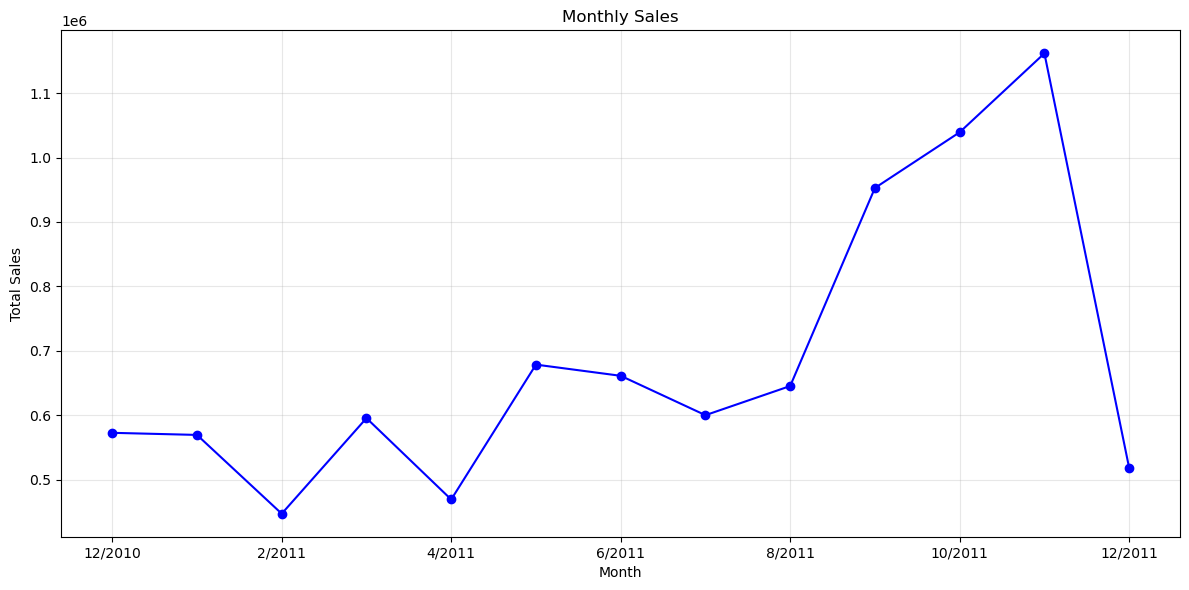

In [21]:
plt.figure(figsize=(12, 6))
monthly_sales = data.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

# Plot with month numbers
plt.plot(range(len(monthly_sales)), monthly_sales.values, marker='o' , color = 'blue')

# Show every other month label
plt.xticks(range(0, len(monthly_sales), 2), 
[f'{date.month}/{date.year}' for date in monthly_sales.index][::2])

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Sales are initially lower but significantly increase in the last few months of the year (October, November, December) 
This "hockey curve" trend is likely due to the holiday season (e.g., Christmas in the UK), potential inventory clearance,   and sales representatives aiming to meet yearly quotas or earn bonuses.
With more historical data, this year-over-year trend could be further confirmed, indicating seasonal buying patterns.

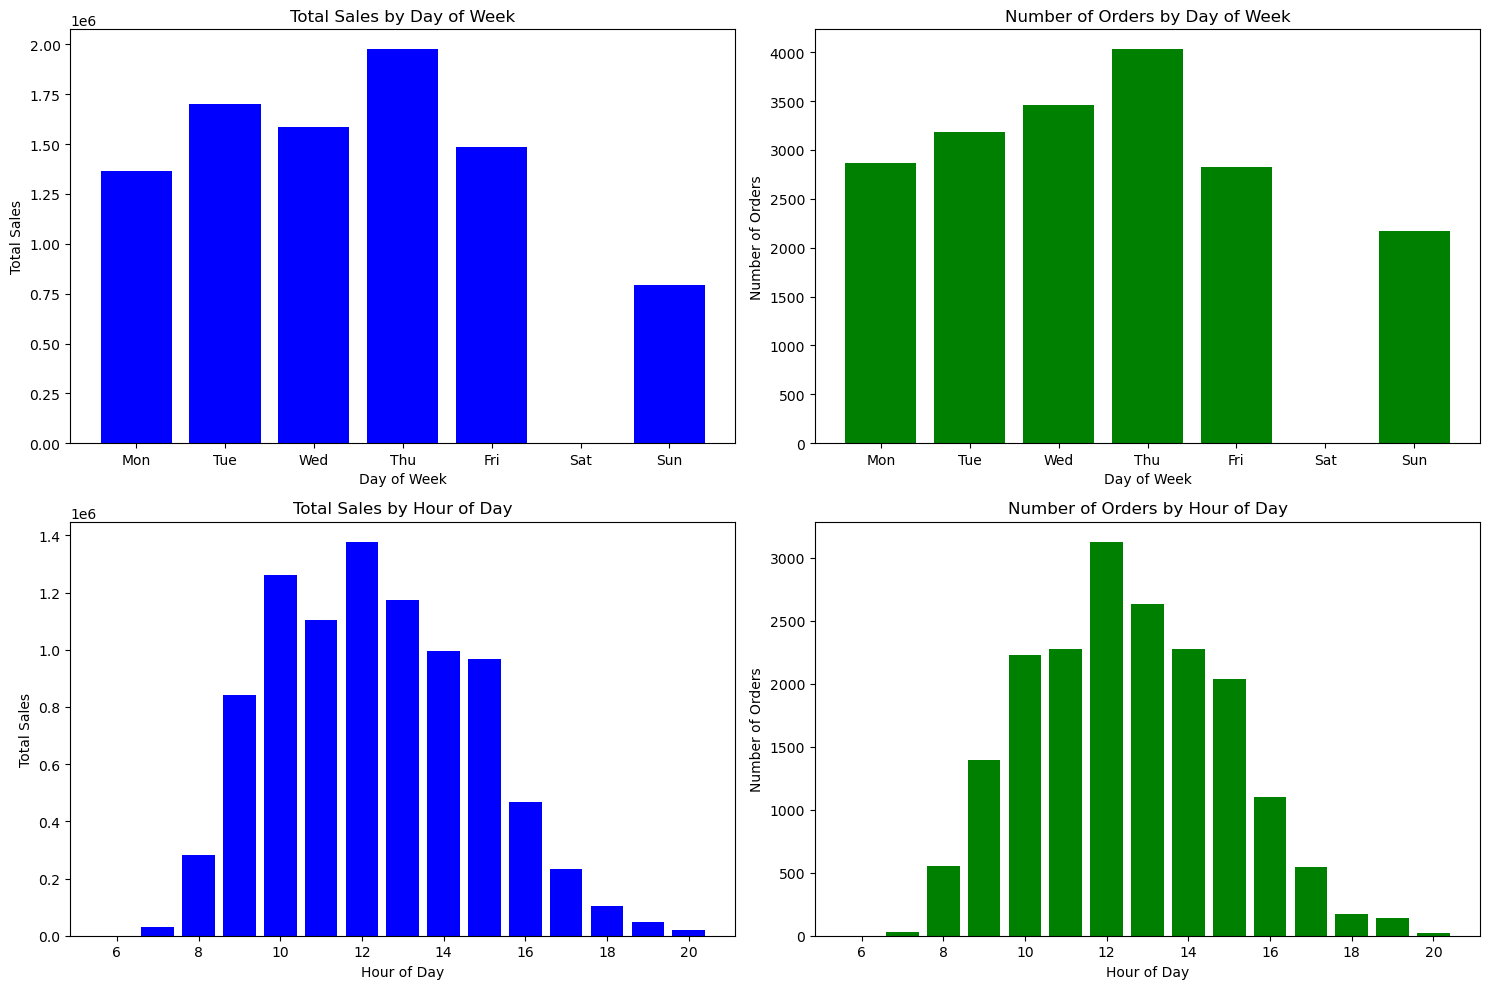

In [22]:
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
data['HourOfDay'] = data['InvoiceDate'].dt.hour

dayofweek_sales = data.groupby('DayOfWeek')['TotalPrice'].sum()
dayofweek_orders = data.groupby('DayOfWeek')['InvoiceNo'].nunique()
hourofday_sales = data.groupby('HourOfDay')['TotalPrice'].sum()
hourofday_orders = data.groupby('HourOfDay')['InvoiceNo'].nunique()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot Total Sales by Day of Week
axes[0, 0].bar(dayofweek_sales.index, dayofweek_sales.values, color = 'blue')
axes[0, 0].set_title('Total Sales by Day of Week')
axes[0, 0].set_xlabel('Day of Week')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].set_xticks(range(7)) # Set ticks for all 7 days
axes[0, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


# Plot Number of Orders by Day of Week
axes[0, 1].bar(dayofweek_orders.index, dayofweek_orders.values, color = 'green')
axes[0, 1].set_title('Number of Orders by Day of Week')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Number of Orders')
axes[0, 1].set_xticks(range(7)) # Set ticks for all 7 days
axes[0, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot Total Sales by Hour of Day
axes[1, 0].bar(hourofday_sales.index, hourofday_sales.values, color='blue')
axes[1, 0].set_title('Total Sales by Hour of Day')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Total Sales')


# Plot Number of Orders by Hour of Day
axes[1, 1].bar(hourofday_orders.index, hourofday_orders.values, color = 'green')
axes[1, 1].set_title('Number of Orders by Hour of Day')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Orders')


plt.tight_layout()
plt.show()

Hoạt động bán hàng (cả về doanh số và số lượng đơn hàng) có sự biến động đáng kể theo cả ngày trong tuần và giờ trong ngày.
1. Theo ngày trong tuần:

- Thứ Năm là ngày có tổng doanh số và số lượng đơn hàng cao nhất. Điều này cho thấy khách hàng có xu hướng mua sắm nhiều nhất vào giữa tuần, có thể liên quan đến các chương trình khuyến mãi hoặc thói quen mua sắm trước cuối tuần.
- Thứ Bảy có doanh số và số lượng đơn hàng thấp nhất. Điều này khá hợp lý vì có thể đây là ngày nghỉ của cửa hàng hoặc khách hàng có xu hướng thực hiện các hoạt động khác vào cuối tuần thay vì mua sắm trực tuyến từ cửa hàng này.
- Các ngày khác trong tuần (Thứ Hai, Thứ Ba, Thứ Tư, Thứ Sáu) có mức doanh số và số lượng đơn hàng tương đối ổn định, thấp hơn Thứ Năm nhưng cao hơn Thứ Bảy.
2. Theo giờ trong ngày:

- Hoạt động bán hàng tập trung chủ yếu vào giờ hành chính, từ khoảng 9 giờ sáng đến 4 giờ chiều (16 giờ).
- 12 giờ trưa (12h) là giờ có tổng doanh số và số lượng đơn hàng cao nhất. Đây là thời điểm khách hàng có thể tranh thủ giờ nghỉ trưa để mua sắm.
- Có một sự sụt giảm đáng kể về doanh số và đơn hàng vào cuối giờ chiều và tối.
- Có rất ít hoặc không có hoạt động bán hàng vào các giờ ngoài giờ hành chính và ban đêm.

## 2. Geographical Analysis

### 2.1 Sales and Customer Distribution by Country

In [23]:

def plot_top_countries(data, grp ,col, n):
    country_sales = data.groupby(grp)[col].sum().sort_values(ascending=False)
    top_countries = country_sales.head(n)

    total_sales_top_countries = country_sales.sum()
    percentage_contribution = (top_countries / total_sales_top_countries) * 100

    colors = ['lightgreen', 'red', 'blue', 'orange', 'purple']

    ax = percentage_contribution.plot(kind='barh', color=colors)
    plt.title(f'Top 5 by {grp} Percentage Contribution to {col}')
    plt.xlabel(f'Percentage Contribution to {col}')
    plt.ylabel(f'{grp}')
    plt.grid()

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')
    plt.show()
    
def plot_least(data, grp ,col, n):
    country_sales = data.groupby(grp)[col].sum().sort_values(ascending=True)
    top_countries = country_sales.head(n)

    total_sales_top_countries = country_sales.sum()
    percentage_contribution = (top_countries / total_sales_top_countries) * 100

    colors = ['lightgreen', 'red', 'blue', 'orange', 'purple']

    ax = percentage_contribution.plot(kind='barh', color=colors)
    plt.title(f'Top 5 by {grp} Percentage Contribution to {col}')
    plt.xlabel(f'Percentage Contribution to {col}')
    plt.ylabel(f'{grp}')
    plt.grid()

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')
    plt.show()

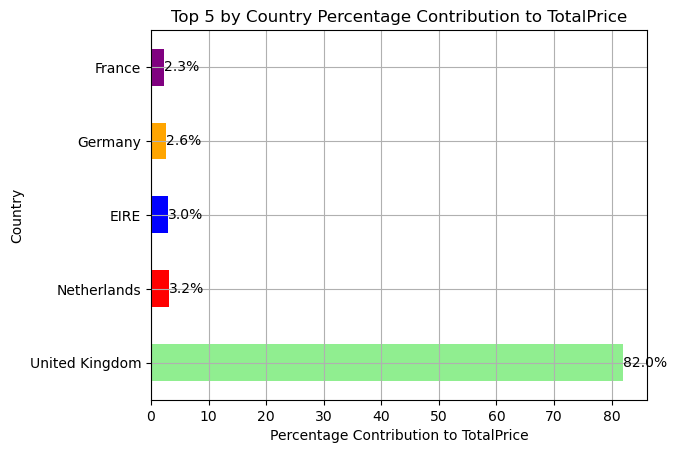

In [24]:
# PLOTTING PERCENTAGE ON GRAPH TO SHOW HOW MUCH DIFFERENT COUNTRIES CONTRIBUTE TO THE SALES
plot_top_countries(data, 'Country','TotalPrice', 5)

The business has a high dependency on the UK market, which contributes approximately 88.1% of total sales.
While this could indicate market expertise, it also presents a risk of over-reliance on a single country; geopolitical crises or changes in regulations could significantly impact the business.
Diversification into other countries is suggested to mitigate this risk, or a strong focus on providing excellent service to UK customers if diversification is not a priority.

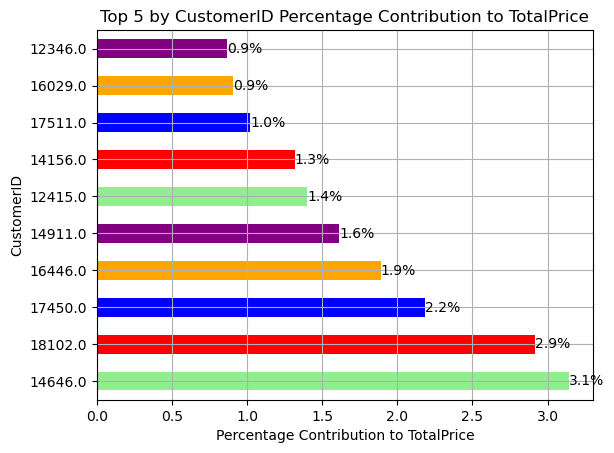

In [25]:
# PLOT TO SEE 10 BEST CUSTOMERS OF THE STORES
plot_top_countries(data, 'CustomerID','TotalPrice', 10)


## 3. Product Performance Analysis

### 3.1 Top Products

Top 10 Most Sold Products (by Quantity):
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


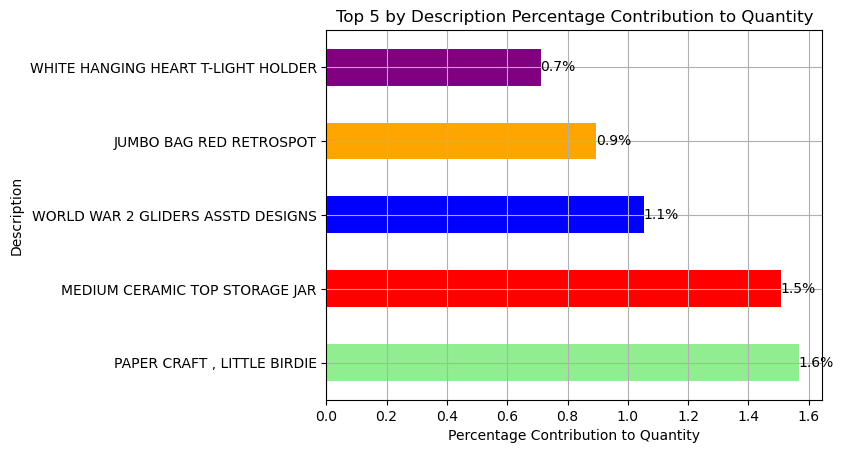


Top 10 Most Sold Products (by Total Price):
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


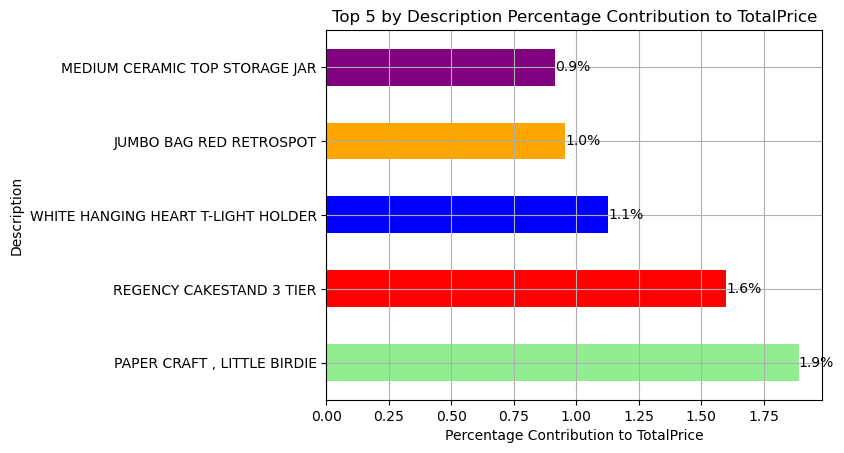

In [26]:
# Identify top 10 most sold products by quantity
top_selling_products_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

print("Top 10 Most Sold Products (by Quantity):")
print(top_selling_products_quantity)

# PLOT TO SEE THE 5 BEST PRODUCTS 
plot_top_countries(data, 'Description','Quantity', 5)

# Identify top 10 most sold products by total price
top_selling_products_price = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 Most Sold Products (by Total Price):")
print(top_selling_products_price)


plot_top_countries(data, 'Description','TotalPrice', 5)


The top-selling product, "PAPER CRAFT," accounts for only about 1.9% of total product sales.
This indicates a diversified product portfolio with no excessive dependency on a single product, which is a positive sign for business stability.

### 3.1 Most and Least Sold Products

In [27]:
# Identify 10 least sold products by quantity
least_selling_products_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(5)

print("\n10 Least Sold Products (by Quantity):")
print(least_selling_products_quantity)
# Insight: Có nhiều sản phẩm chỉ bán được số lượng rất ít (chỉ 1 sản phẩm), có thể cần xem xét lại việc duy trì các mặt hàng này trong kho.

# plot_least(data, 'Description','Quantity', 5)

# Identify 10 least sold products by total price
least_selling_products_price = data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=True).head(5)

print("\n10 Least Sold Products (by Total Price):")
print(least_selling_products_price)
# Insight: Một số sản phẩm có tổng doanh thu rất thấp, thậm chí gần bằng 0, điều này có thể là do giá trị đơn vị thấp hoặc số lượng bán ra không đáng kể.

# plot_least(data, 'Description','TotalPrice', 5)


10 Least Sold Products (by Quantity):
Description
 I LOVE LONDON MINI RUCKSACK         1
VINTAGE BEAD PINK JEWEL STAND        1
AMBER BERTIE GLASS BEAD BAG CHARM    1
HEN HOUSE W CHICK IN NEST            1
CHERRY BLOSSOM PURSE                 1
Name: Quantity, dtype: int64

10 Least Sold Products (by Total Price):
Description
PADS TO MATCH ALL CUSHIONS         0.003
HEN HOUSE W CHICK IN NEST          0.420
SET 12 COLOURING PENCILS DOILEY    0.650
VINTAGE BLUE TINSEL REEL           0.840
PINK CRYSTAL GUITAR PHONE CHARM    0.850
Name: TotalPrice, dtype: float64


## 4. Explore Cancellations and Returns

In [28]:
# Analyze cancelled orders
cancelled_orders = df[df['InvoiceNo'].str.contains('C', na=False)]

print("Number of cancelled orders:", len(cancelled_orders))
print("\nSample of cancelled orders:")
display(cancelled_orders.head())

# Phân tích tác động của việc hủy đơn hàng lên tổng doanh số (tùy vào việc mình định nghĩa tác động này là gì)
# Vd có thể so sánh tổng doanh số trước và sau khi xóa các đơn hàng đã hủy

Number of cancelled orders: 8905

Sample of cancelled orders:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [29]:
import datetime as dt
def create_rfm_features(df):
    snapshot_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

    # RFM
    rfm = data.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,           # Recency
        'InvoiceNo': 'nunique',         # Frequency
        'TotalPrice': 'sum'             # Monetary
    }).reset_index()

    rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
    return rfm

rfm = create_rfm_features(data)
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


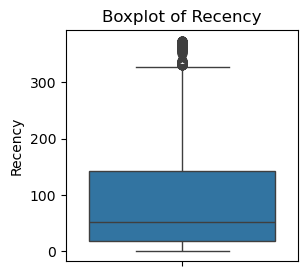

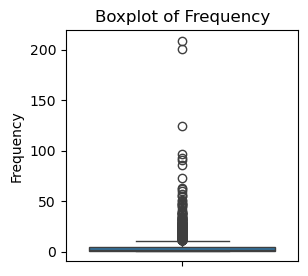

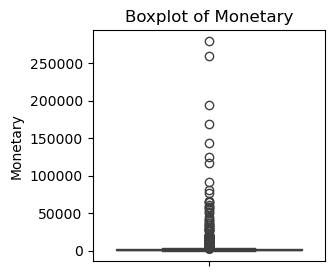

In [30]:
# Plotting boxplots for R, F, M
def plot_boxplot(column, data):
    plt.figure(figsize=(3, 3))
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    #plt.ylim(lower_bound - 10, upper_bound + 10)
    plt.show()

for col in ['Recency', 'Frequency', 'Monetary']:
    plot_boxplot(col, rfm)

# R không nhiều outlier
# F, M có nhiều outlier cần bỏ đi để tiến hành phân cụm
# -3 : Nhóm có outlier F nhưng ko có M
# -2: Nhóm có outlier M nhưng ko có F
# -1: Nhóm có cả 2 outlier


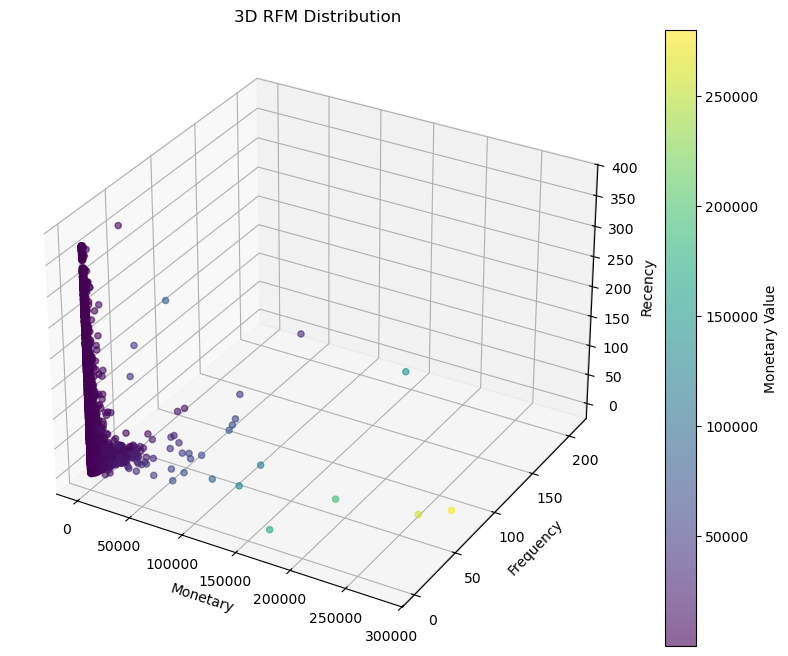

In [31]:
def plot_3d_rfm(df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df['Monetary'],
                        df['Frequency'],
                        df['Recency'],
                        c=df['Monetary'],
                        cmap='viridis',
                        alpha=0.6)

    ax.set_xlabel('Monetary')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Recency')
    
    plt.colorbar(scatter, label='Monetary Value')
    plt.title('3D RFM Distribution')
    plt.show()

plot_3d_rfm(rfm)
# Có quá nhiều outlier cần phải được xử lí

# Churn Analysis

In [32]:
customer_last_purchase = rfm['Recency']
churn_threshold = 150
churn_customers = rfm[customer_last_purchase > churn_threshold]
churn_customers

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
4,12350.0,310,1,334.40
6,12353.0,204,1,89.00
7,12354.0,232,1,1079.40
8,12355.0,214,1,459.40
...,...,...,...,...
4313,18250.0,310,1,349.27
4319,18260.0,173,6,2643.20
4325,18269.0,366,1,168.60
4333,18280.0,278,1,180.60


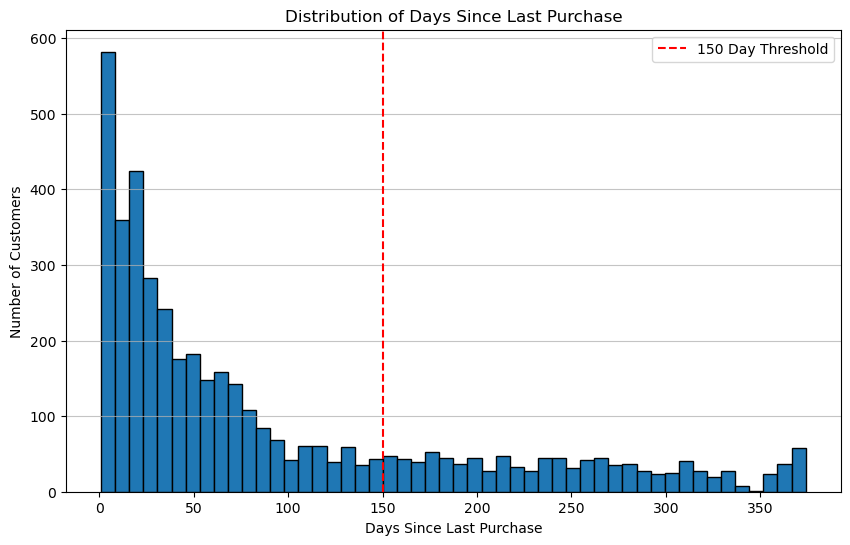

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, edgecolor='black')
plt.axvline(x=150, color='red', linestyle='--', label='150 Day Threshold')
plt.title('Distribution of Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Customers who have not made a purchase for more than 90 days are classified as "churned" or at risk of leaving the business.
Identifying these churned customers allows the business to reach out with promotional offers or coupons to encourage them to return and make new purchases, thereby improving customer retention  
Đây thuộc nhóm At Risk/Hibernating của mình 